# Churn Prediction (Telco-Customer)

Churn is a one of the biggest problem in the telecom industry.

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

In [79]:
#Dataframe
data1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [80]:
data1.iloc[2]

customerID              3668-QPYBK
gender                        Male
SeniorCitizen                    0
Partner                         No
Dependents                      No
tenure                           2
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                   Yes
DeviceProtection                No
TechSupport                     No
StreamingTV                     No
StreamingMovies                 No
Contract            Month-to-month
PaperlessBilling               Yes
PaymentMethod         Mailed check
MonthlyCharges               53.85
TotalCharges                108.15
Churn                          Yes
Name: 2, dtype: object

In [3]:
#Check the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns[1]

'gender'

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Convert data to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
#Check null columns after conversion
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df2 = data

In [12]:
#Replace value from object to numeric
kolom = ["Partner", "Dependents", "Churn", "PhoneService", 'PaperlessBilling']
for i in kolom:
    df2[i].replace(to_replace='Yes', value=1, inplace=True)
    df2[i].replace(to_replace='No', value=0, inplace=True)
    
#Replace value from object to numeric
df2['gender'].replace(to_replace='Female', value=1, inplace=True)
df2['gender'].replace(to_replace='Male', value=0, inplace=True)

#Replace value from object to numeric
kolom = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in kolom:
    df2[i].replace(to_replace='Yes', value=1, inplace=True)
    df2[i].replace(to_replace='No', value=0, inplace=True)
    df2[i].replace(to_replace='No internet service', value=2, inplace=True)

df2["MultipleLines"].replace(to_replace='Yes', value=1, inplace=True)
df2["MultipleLines"].replace(to_replace='No', value=0, inplace=True)
df2["MultipleLines"].replace(to_replace='No phone service', value=2, inplace=True)

df2["InternetService"].replace(to_replace='DSL', value=1, inplace=True)
df2["InternetService"].replace(to_replace='No', value=0, inplace=True)
df2["InternetService"].replace(to_replace='Fiber optic', value=2, inplace=True)

df2["Contract"].replace(to_replace='One year', value=1, inplace=True)
df2["Contract"].replace(to_replace='Month-to-month', value=0, inplace=True)
df2["Contract"].replace(to_replace='Two year', value=2, inplace=True)

df2["PaymentMethod"].replace(to_replace='Mailed check', value=1, inplace=True)
df2["PaymentMethod"].replace(to_replace='Electronic check', value=0, inplace=True)
df2["PaymentMethod"].replace(to_replace='Bank transfer (automatic)', value=2, inplace=True)
df2["PaymentMethod"].replace(to_replace='Credit card (automatic)', value=3, inplace=True)

In [78]:
data.iloc[2]

customerID          3668-QPYBK
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       2
PhoneService                 1
MultipleLines                0
InternetService              1
OnlineSecurity               1
OnlineBackup                 1
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             1
PaymentMethod                1
MonthlyCharges           53.85
TotalCharges            108.15
Churn                        1
Name: 2, dtype: object

In [13]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.60,1


In [14]:
#Drop the null rows because only 11 rows are null
df2.dropna(inplace=True)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [16]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3865705817.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

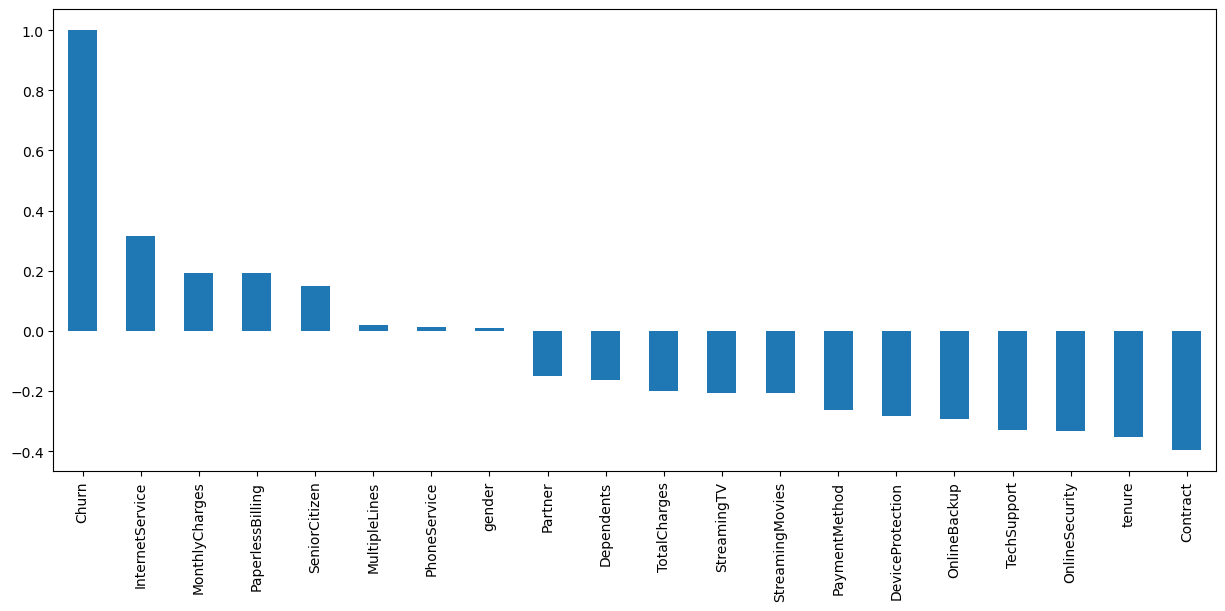

In [17]:
#Check the correlation with the churn column
df_dummies = df2
plt.figure(figsize=(15,6))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\143883325.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dummies.corr()


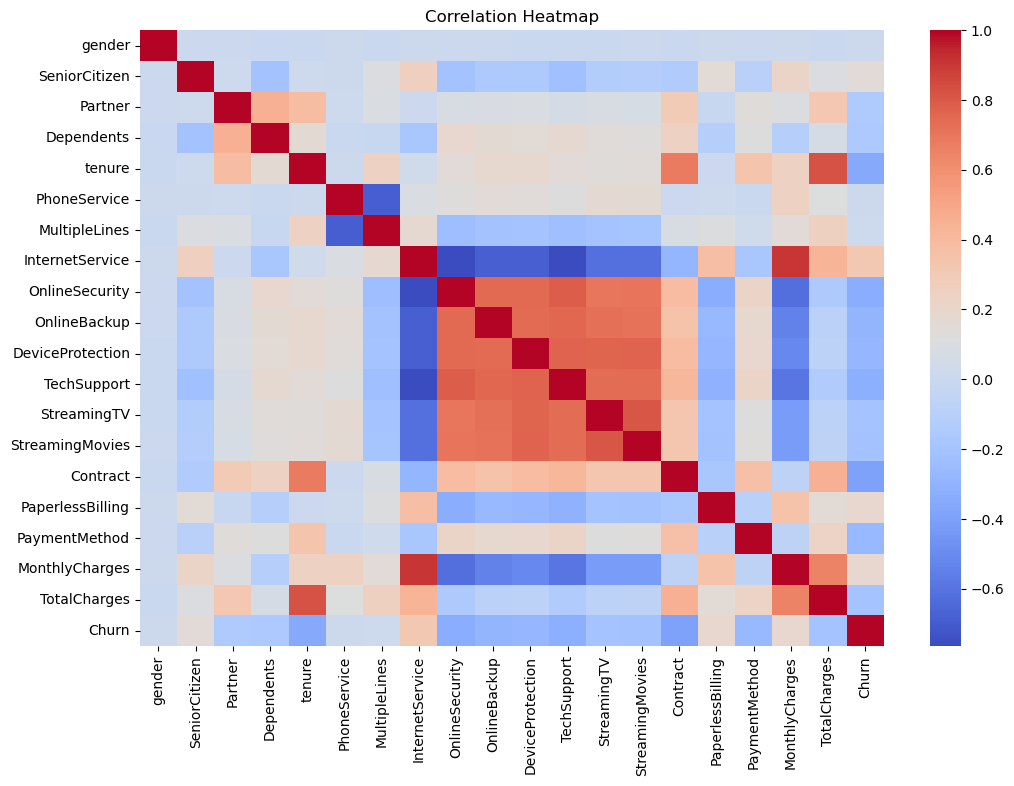

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_dummies.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Some columns have strong correlation with Churn column. Month to month contract, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online Security, Streaming TV, online backup, and tech support without internet connection seem to be negatively related to churn.

We willl explore the patterns later.

## 1. Check the Churn Distribution 

The Churn data is dominated by around 70% 'No' label  

<Axes: xlabel='Churn', ylabel='count'>

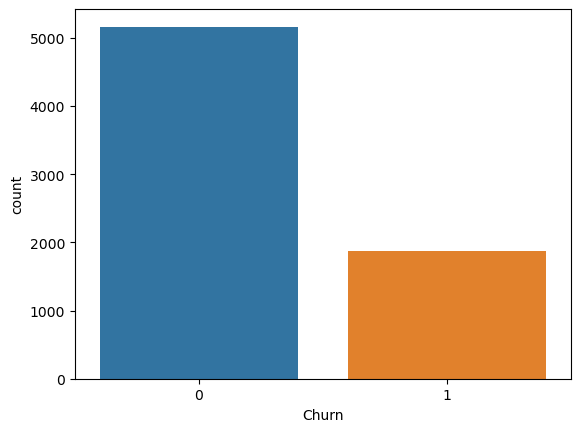

In [19]:
sns.countplot(x='Churn', data=data)

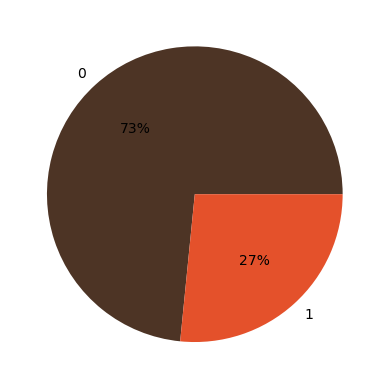

In [20]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data))
label = ax.index

#create pie chart
plt.pie(ax, labels=label, colors = colors, autopct='%.0f%%')
plt.show()

## 2. Demographics

 **a. Gender Distribution** - About half of the customers in the dataset are male while the other half are female

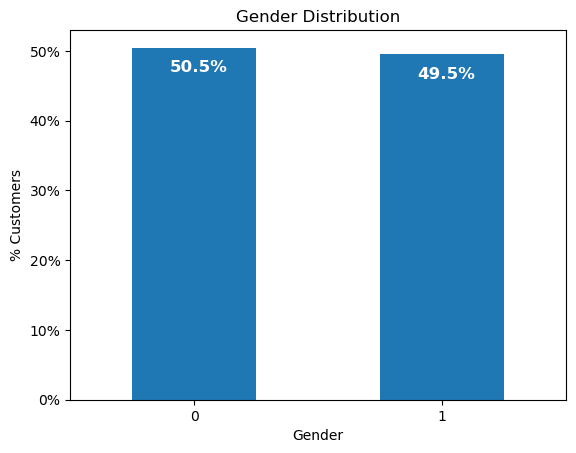

In [21]:
ax = (data['gender'].value_counts()*100.0/len(data)).plot(kind='bar',
                                                        stacked=True,
                                                        rot=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

totals = [i.get_width() for i in ax.patches]

total=sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**b. % of Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of the customers in the data are young people.

Text(0.5, 1.0, '% of Senior Citizens')

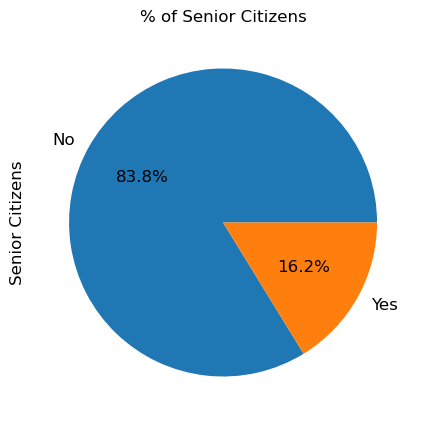

In [22]:
ax = (data['SeniorCitizen'].value_counts()*100.0/len(data))\
.plot.pie(autopct='%1.1f%%', labels = ['No', 'Yes'], figsize=(5,5), fontsize=12)
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

**c. Partner and dependent status** - About 50% of customers have a partner, while only 30% of the total customers have dependents

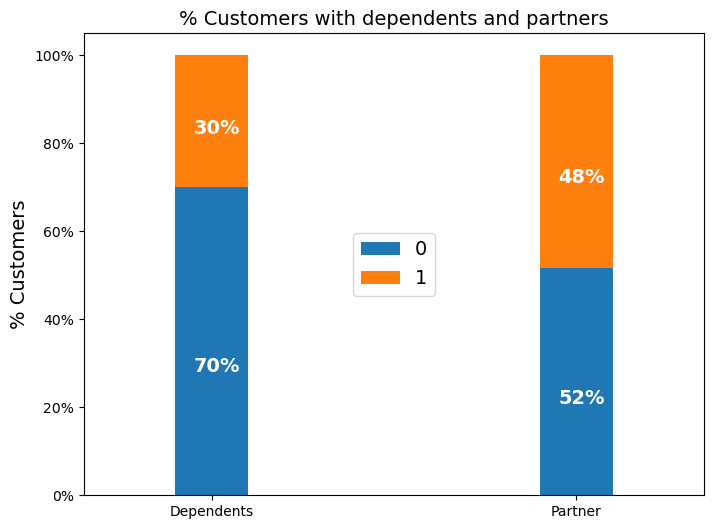

In [23]:
pnd_data = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = pnd_data.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data)

ax = df3.loc[:,'customerID'].plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

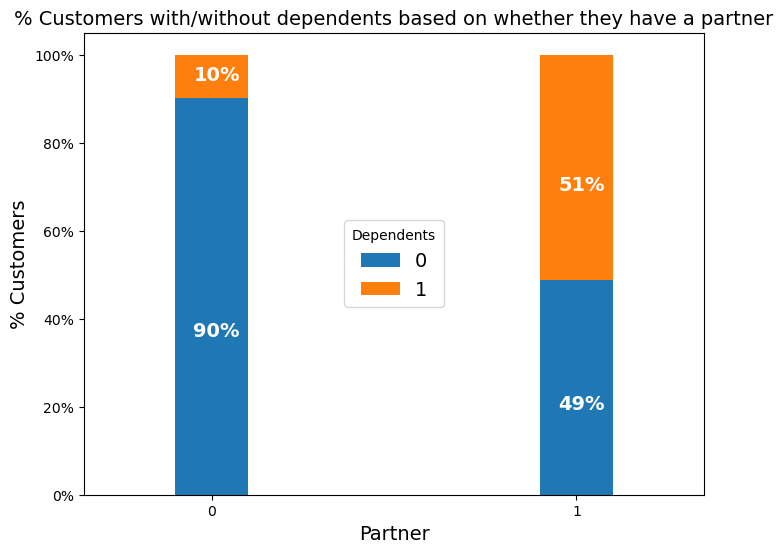

In [24]:

partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6)                                                                )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## 3. Customer Account Information

**a. Tenure** - From the histogram below, we know that the tenure of the customers varies from 0-72 months. A lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This tenure may affect the churn of the customers.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3097386497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['tenure'],kde=False,bins=36,color='darkblue',hist_kws={'edgecolor':'black'})


Text(0.5, 1.0, '# of Customers by Tenure')

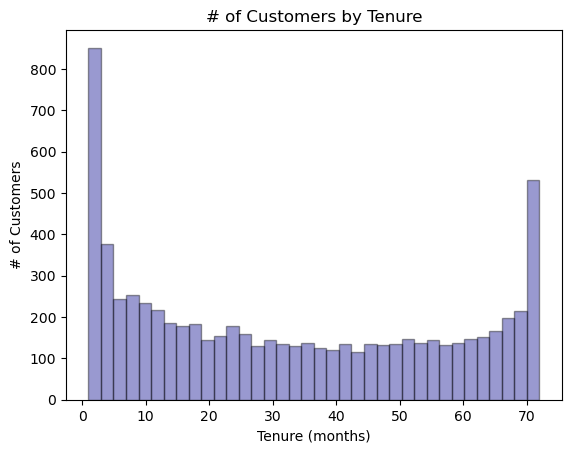

In [25]:
ax = sns.distplot(data['tenure'],kde=False,bins=36,color='darkblue',hist_kws={'edgecolor':'black'})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by Tenure')

**b. Cotracts** - The most of the customers are in month to month contract. While there are almost equal number of customers in 1 year and 2 year contracts.

Text(0.5, 1.0, '# of Customers by Contract Type')

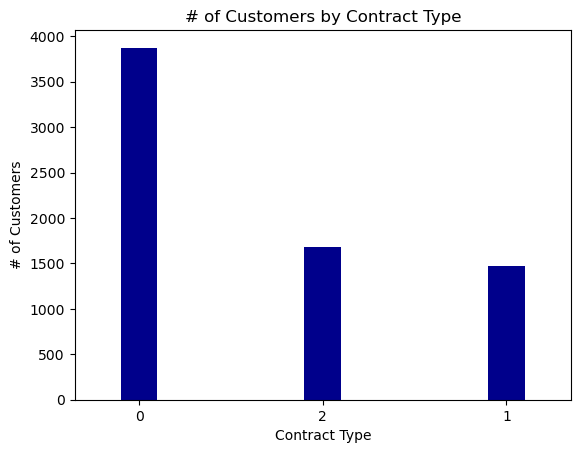

In [26]:
ax = data['Contract'].value_counts().plot(kind='bar', width=0.2, rot=0, color='darkblue')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Contract Type')
ax.set_title('# of Customers by Contract Type')

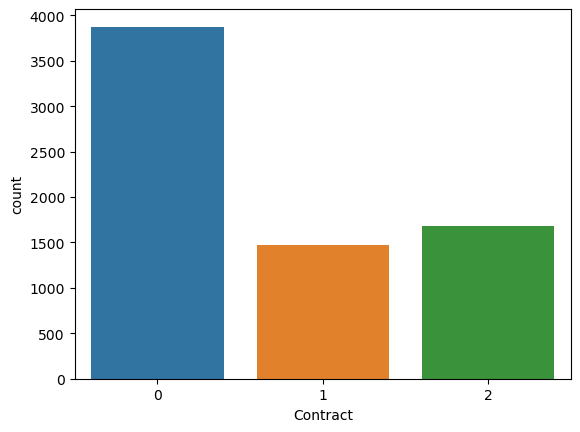

In [27]:
ax = sns.countplot(x="Contract", data=data)

Most of the monthly contracts last for 1-2 months, while the 2 year contract tends to last dor about 70 months or more. The customers taking a longer contract are more loyal.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3372689798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],kde=False,bins=36,color='turquoise',hist_kws={'edgecolor':'black'}, ax=ax1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3372689798.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

Text(0.5, 1.0, 'Two Year Controcat')

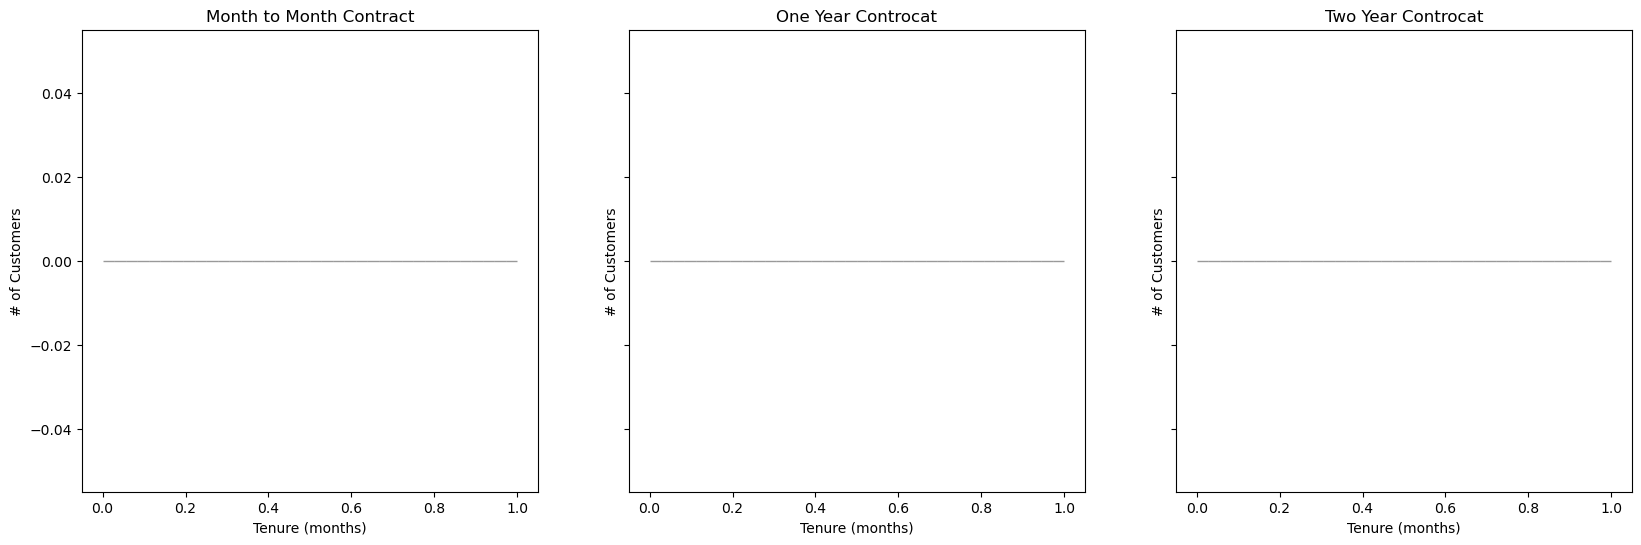

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],kde=False,bins=36,color='turquoise',hist_kws={'edgecolor':'black'}, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],kde=False,bins=36,color='steelblue',hist_kws={'edgecolor':'black'}, ax=ax2)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Controcat')

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],kde=False,bins=36,color='darkblue',hist_kws={'edgecolor':'black'}, ax=ax3)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Controcat')

In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 4. Distribution of Various Service

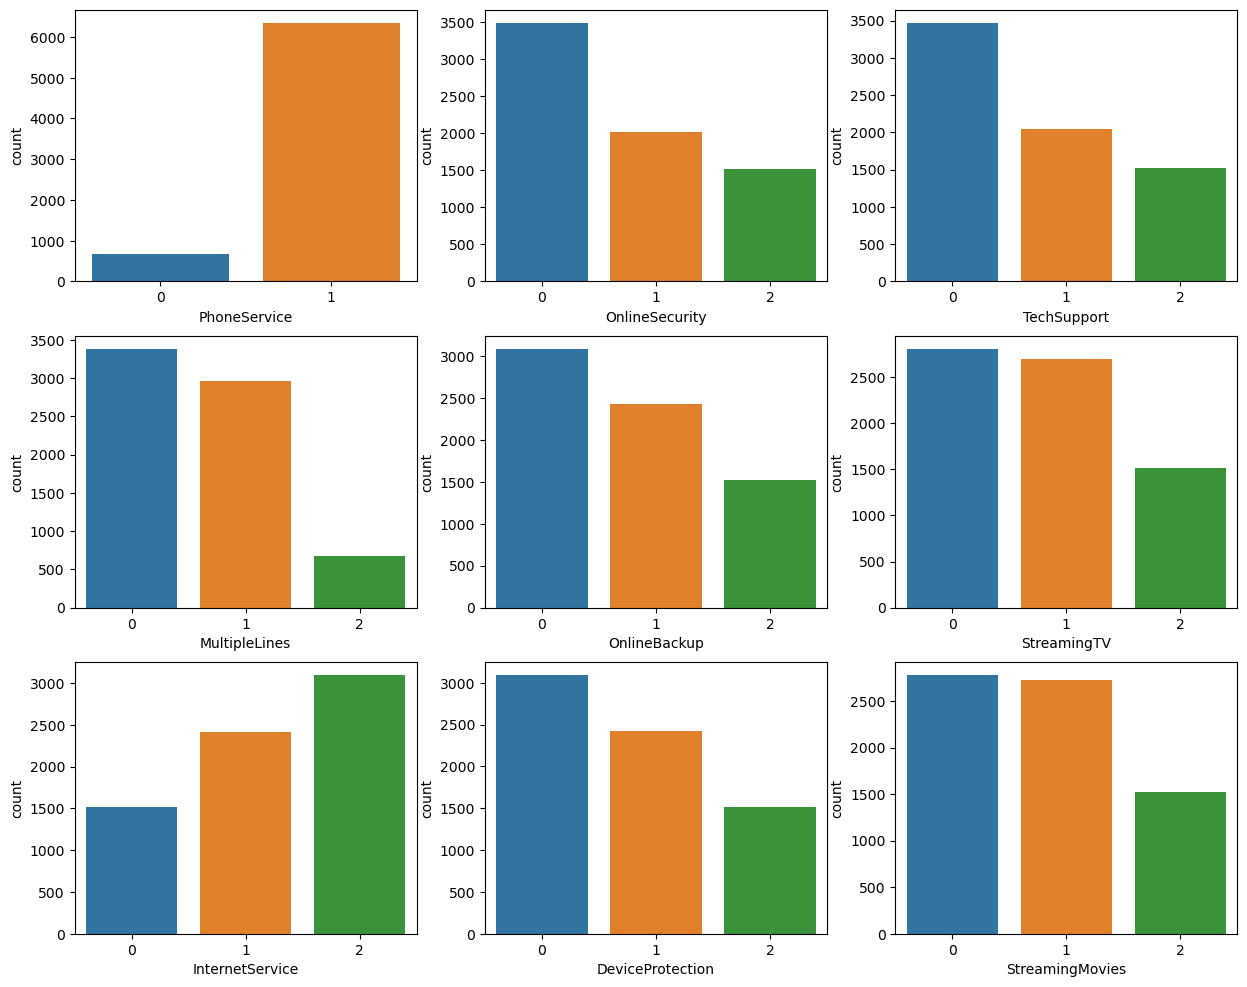

In [30]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(x=item, data=data, ax=axes[i,0])
        
    elif i >=3 and i < 6:
        ax = sns.countplot(x=item, data=data, ax=axes[i-3,1])
        
    else:
        ax = sns.countplot(x=item, data=data, ax=axes[i-6,2])
  

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

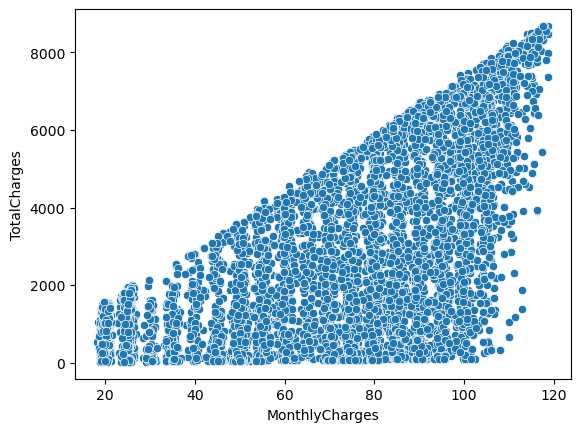

In [31]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=data)

<Axes: xlabel='Churn', ylabel='tenure'>

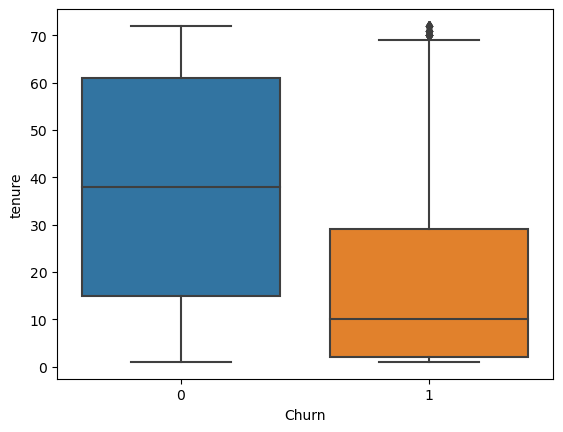

In [32]:
sns.boxplot(x = data.Churn, y= data.tenure)

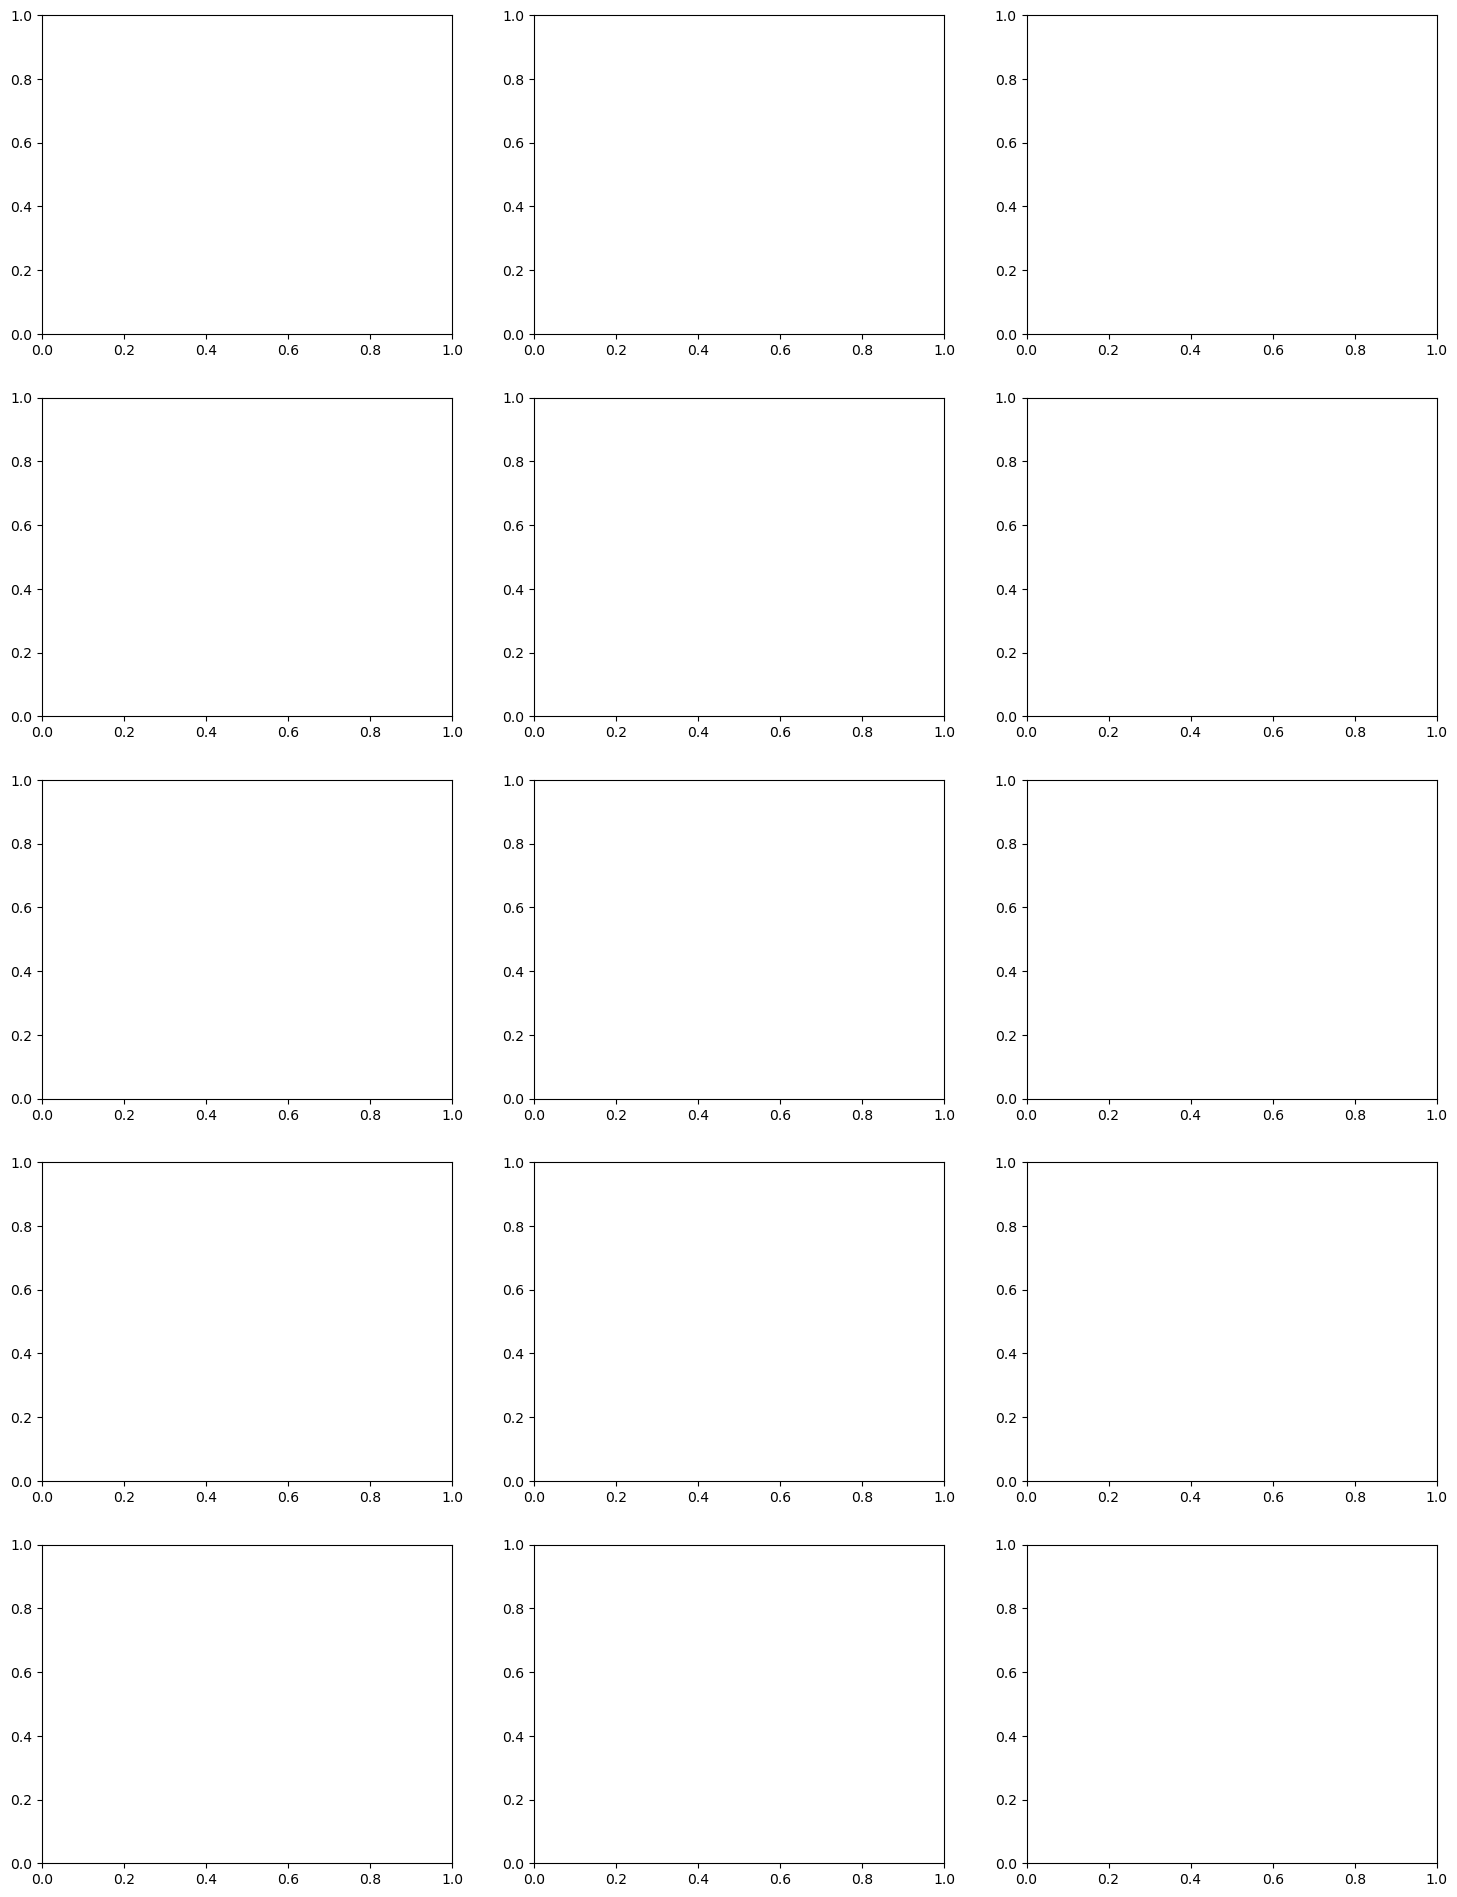

In [33]:
cat_cols = data.drop(['customerID', 'Churn'], axis=1).select_dtypes(include='object').columns
fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize = (18,24))

for i, item in enumerate(cat_cols):
    if i < 5:
        ax = sns.countplot(x=item, data=data, ax=axes[i,0], hue='Churn')
        
    elif i >=5 and i < 10:
        ax = sns.countplot(x=item, data=data, ax=axes[i-5,1], hue='Churn')
        
    else:
        ax = sns.countplot(x=item, data=data, ax=axes[i-10,2], hue='Churn')
        

  

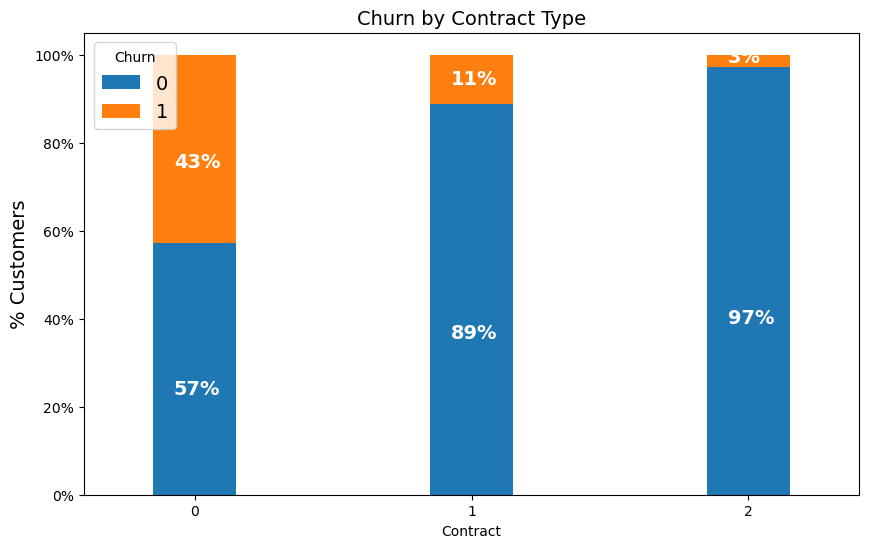

In [34]:

contact_churn = data.groupby(['Contract', 'Churn']).size().unstack()

ax = (contact_churn.T*100.0/contact_churn.T.sum()).T.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize= (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

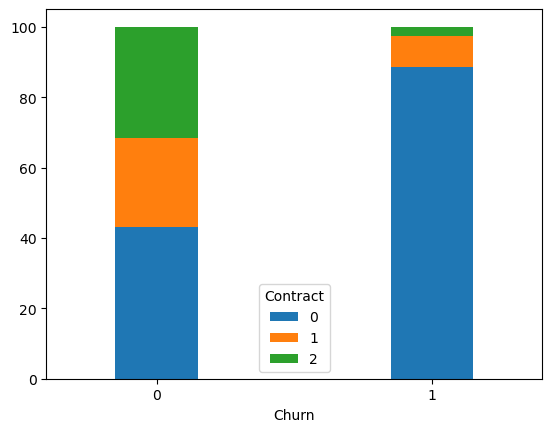

In [35]:
ax = (contact_churn*100.0/contact_churn.sum()).T.plot(kind='bar', width=0.3, stacked=True, rot=0)

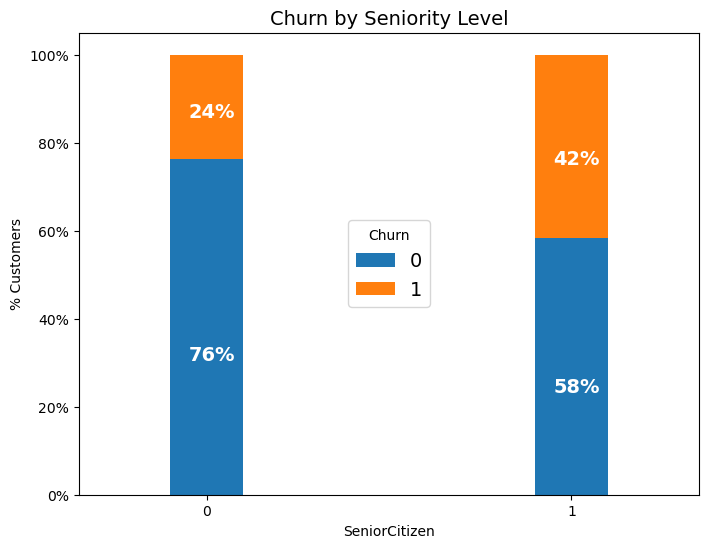

In [36]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [37]:
data.drop(['customerID', 'Churn'], axis=1).select_dtypes(include='object').columns

Index([], dtype='object')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\4221374299.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\4221374299.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

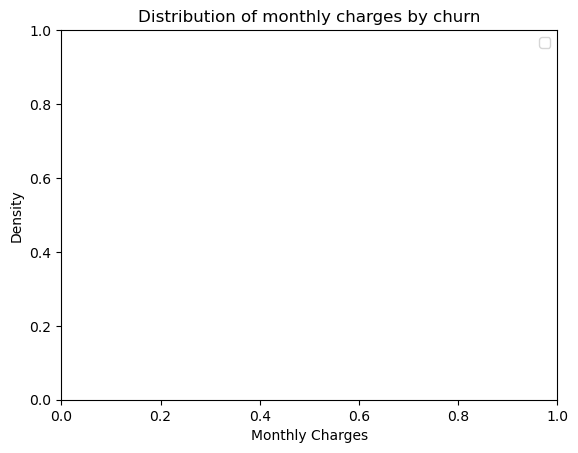

In [38]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3001494424.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23384\3001494424.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

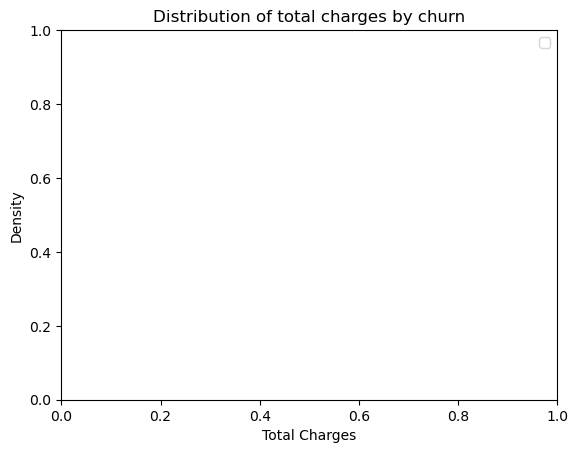

In [39]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [40]:
dfcheck = df2.copy()
for colname in dfcheck.select_dtypes("object"):
    dfcheck[colname], _ = dfcheck[colname].factorize()

In [41]:
dfcheck

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,2,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,3,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,4,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7027,0,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,0
7039,7028,1,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,0
7040,7029,1,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,7030,0,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,1,74.40,306.60,1


In [42]:
dfcheck_target = dfcheck.pop('Churn')
dfcheck_target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

## Feature Importance

In [43]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = dfcheck.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(dfcheck, dfcheck_target, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Contract            0.120823
OnlineSecurity      0.068776
DeviceProtection    0.048597
MonthlyCharges      0.038465
StreamingTV         0.021912
SeniorCitizen       0.014743
MultipleLines       0.005652
Name: MI Scores, dtype: float64

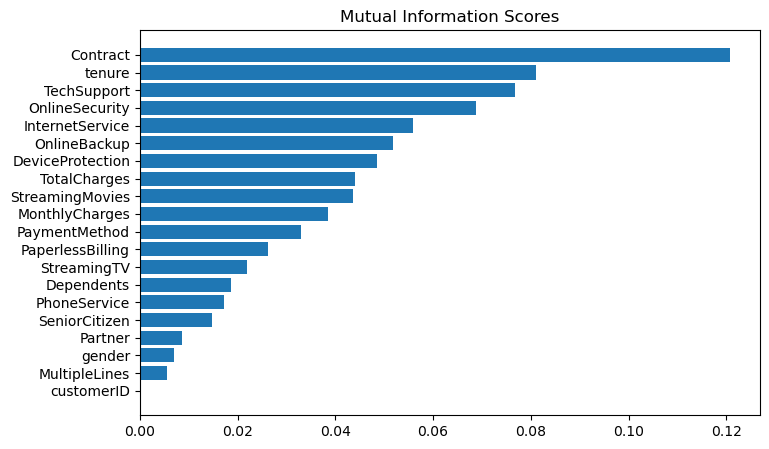

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Make ML Model

In [65]:
df_dummies = df2
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn',"customerID"])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90
7040,1,0,1,1,11,0,2,1,1,0,0,0,0,0,0,1,0,29.60,346.45
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60


In [64]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X))
X.columns = features


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.115423,0.001275
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.333333,0.385075,0.215867
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.354229,0.010310
3,0.0,0.0,0.0,0.0,0.619718,0.0,1.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.666667,0.239303,0.210241
4,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0,0.333333,0.662189,0.227521
7028,1.0,0.0,1.0,1.0,1.000000,1.0,0.5,1.0,0.0,0.5,0.5,0.0,0.5,0.5,0.5,1.0,1.000000,0.845274,0.847461
7029,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.112935,0.037809
7030,0.0,1.0,1.0,0.0,0.042254,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.558706,0.033210


In [53]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [54]:
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

NameError: name 'model_rf' is not defined

In [55]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

NameError: name 'model' is not defined

In [56]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

NameError: name 'preds' is not defined

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBRFClassifier
model = XGBRFClassifier(learning_rate=0.05, n_estimators=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.8052594171997157

In [60]:
import joblib

# Save the trained model
joblib.dump(model, 'churn_xgbrf_model.pkl')

['churn_xgbrf_model.pkl']

In [61]:
import joblib

# Load the saved model
loaded_model = joblib.load('https://github.com/gusti19/churnrate/blob/main/churn_xgbrf_model_2.pkl')

In [62]:
#Load Model

preds = loaded_model.predict(X_test)
accuracy_score(y_test, preds)

0.8052594171997157

In [ ]:
row = X.iloc[4]

# Menampilkan baris yang diambil
row = pd.DataFrame(row).transpose()

row

In [ ]:
preds = loaded_model.predict(row)
preds

In [63]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
328,1.0,1.0,1.0,1.0,0.380282,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.000000,0.175622,0.110183
5512,0.0,0.0,0.0,0.0,0.816901,1.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,0.0,0.0,1.0,0.000000,0.461692,0.428877
4692,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.274627,0.010016
726,1.0,0.0,1.0,1.0,0.056338,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.000000,0.622886,0.038922
5881,1.0,0.0,0.0,0.0,0.957746,1.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0,1.0,1.000000,0.667662,0.678352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.0,0.0,1.0,0.0,0.971831,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.666667,0.015423,0.159110
25,1.0,0.0,0.0,0.0,0.408451,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.368657,0.174452
3579,0.0,1.0,1.0,0.0,0.464789,1.0,0.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.333333,0.715423,0.358874
2490,1.0,0.0,1.0,0.0,0.521127,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.019900,0.091847


In [ ]:
# Daftar fitur
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
            'MonthlyCharges', 'TotalCharges']

# Membuat dictionary kosong untuk data input
data = {}

# Mengisi data input berdasarkan fitur
for feature in features:
    value = input("Masukkan nilai untuk {}: ".format(feature))
    data[feature] = [value]

# Membuat DataFrame dari data input
input_data = pd.DataFrame(data)

# Menampilkan data input
print(input_data)

## Visualisasi Proposal

In [ ]:
!pip install matplotlib-venn
from matplotlib_venn import venn2

# Contoh data komponen
komponen_A = set(['Customer Demographics', 'Service Usage', 'Customer Satisfaction'])
komponen_B = set(['Customer Satisfaction', 'Customer Interactions', 'Competitor Analysis'])

# Membuat diagram Venn
venn2([komponen_A, komponen_B], set_labels=('Komponen A', 'Komponen B'))

# Menampilkan diagram
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik alir
G = nx.DiGraph()
G.add_edges_from([
    ('Customer Demographics', 'Service Usage'),
    ('Service Usage', 'Customer Satisfaction'),
    ('Service Usage', 'Customer Interactions'),
    ('Contract Details', 'Customer Satisfaction'),
    ('Contract Details', 'Customer Interactions'),
    ('Customer Satisfaction', 'Customer Interactions'),
    ('Customer Interactions', 'Customer Satisfaction'),
    ('Competitor Analysis', 'Service Usage'),
    ('Competitor Analysis', 'Contract Details'),
    ('Competitor Analysis', 'Customer Satisfaction')
])

# Menentukan ukuran frame
plt.figure(figsize=(16, 6))

# Menampilkan grafik
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)

# Menampilkan grafik dengan frame yang diperbesar
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik alir
G = nx.DiGraph()
G.add_edges_from([('Customer Demographics', 'service usage'), ('Customer Demographics', 'contract details'), ('Customer Demographics', 'customer satisfaction'), ('Customer Demographics', 'customer interactions')])
G.add_edges_from([('Service Usages', 'customer satisfaction'), ('Service Usages', 'customer interactions')])
G.add_edges_from([('Contract Details', 'customer satisfaction'), ('Contract Details', 'customer interactions')])
G.add_edges_from([('Customer Satisfaction', 'customer satisfaction'), ('Contract Details', 'customer interactions')])

# Menampilkan grafik
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
plt.show()


In [ ]:
!pip install streamlit

In [ ]:
!streamlit --version

In [ ]:
!streamlit run input.py